In [1]:
import sys
sys.path.append("..")

In [2]:
from data_tools.tools import *
from scipy.integrate import odeint
import seaborn as sns
from matplotlib import pyplot as plt
from DE_Library.diferential_equation_functionals import *

from matplotlib import rc
rc('text', usetex=True)

In [3]:
results = load_feather_folder_as_pd("../data/results/DE_3_35")

['../data/results/DE_3_35\\0.feather', '../data/results/DE_3_35\\1.feather', '../data/results/DE_3_35\\10.feather', '../data/results/DE_3_35\\100.feather', '../data/results/DE_3_35\\101.feather', '../data/results/DE_3_35\\102.feather', '../data/results/DE_3_35\\103.feather', '../data/results/DE_3_35\\104.feather', '../data/results/DE_3_35\\105.feather', '../data/results/DE_3_35\\106.feather', '../data/results/DE_3_35\\107.feather', '../data/results/DE_3_35\\11.feather', '../data/results/DE_3_35\\12.feather', '../data/results/DE_3_35\\120.feather', '../data/results/DE_3_35\\121.feather', '../data/results/DE_3_35\\122.feather', '../data/results/DE_3_35\\123.feather', '../data/results/DE_3_35\\124.feather', '../data/results/DE_3_35\\125.feather', '../data/results/DE_3_35\\126.feather', '../data/results/DE_3_35\\127.feather', '../data/results/DE_3_35\\128.feather', '../data/results/DE_3_35\\129.feather', '../data/results/DE_3_35\\13.feather', '../data/results/DE_3_35\\130.feather', '../dat

c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' 

1.7687137126922607


c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)


In [4]:
#include an extra column called epochs, which generates and array from 0 to the number of epochs

results["epochs"] = results["loss_history"].apply(lambda x: np.arange(len(x)))


results["loss_history_cp"] = results["loss_history"]


results["mse_history_cp"] = results["mse_history"]


In [5]:
results["Number of qubits"] = results["num_qubits"]
results["Iteration"] = results["epochs"]

In [6]:

#results_QK_exploded["loss_history"] change name to results_QK_exploded["$\mathcal{L}(f^\prime(x), f(x), x)$"]
loss_history_str = "$\mathcal{L}(f^\prime(x), f(x), x)$"
mse_history_str = r"$|f(x)-f_{\mathrm{exact}}(x)|^2$"


results[loss_history_str] = results["loss_history"]
results[mse_history_str] = results["mse_history"]

results["Number of qubits"] = results["num_qubits"]
results["Iteration"] = results["epochs"]


In [12]:
results_Kernels["min " + mse_history_str]

0      [77.13868317268808, 55.03313531554493, 24.0768...
1      [77.13868317268808, 55.03313531554493, 24.0768...
2      [201.67147817520362, 98.94179137700907, 67.063...
3      [5.183163975320272, 2.790431663720403, 0.47852...
4      [5.183163975320272, 2.790431663720403, 0.47852...
                             ...                        
690    [27.89439954450056, 2.21620002576582, 1.401544...
691    [5.183163975320272, 2.790431663720403, 0.47852...
692    [5.183163975320272, 2.790431663720403, 0.47852...
693    [5.183163975320272, 2.790431663720403, 0.47852...
694    [5.183163975320272, 2.790431663720403, 0.47852...
Name: min $|f(x)-f_{\mathrm{exact}}(x)|^2$, Length: 695, dtype: object

In [25]:
results_Kernels.keys()

Index(['f_sol', 'optimal_alpha', 'mse', 'mse_normalized', 'method',
       'loss_name', 'domain', 'executor_type', 'encoding_circuit',
       'num_qubits', 'num_layers', 'mse_history', 'loss_history', 'eta',
       'epochs', 'loss_history_cp', 'mse_history_cp', 'Number of qubits',
       'Iteration', '$\mathcal{L}(f^\prime(x), f(x), x)$',
       '$|f(x)-f_{\mathrm{exact}}(x)|^2$',
       'min $|f(x)-f_{\mathrm{exact}}(x)|^2$',
       'min $\mathcal{L}(f^\prime(x), f(x), x)$'],
      dtype='object')

In [7]:
#results with method = QNN
results_Kernels = results[results["method"] != "QNN"]


#min mse_history_str apply and get the last elemetn of the list
results_Kernels["min " + mse_history_str] = results_Kernels.apply(lambda x: x[mse_history_str][-1], axis=1)
results_Kernels["min " + loss_history_str] = results_Kernels.apply(lambda x: x[loss_history_str][-1], axis=1)



filtering_columns_Kernel = ["method", "loss_name", "Number of qubits", "num_layers", "min " + mse_history_str, "eta"]
mse_df_Kernels = results_Kernels[["method", "loss_name", "Number of qubits", "num_layers", "min " + mse_history_str, "f_sol", "domain", "loss_history_cp", "mse_history_cp", "eta"]].drop_duplicates(subset=filtering_columns_Kernel).rename(columns={"min " + mse_history_str: "min_loss"})
mse_df_Kernels["Type of Loss"] = mse_history_str

filtering_columns_Kernel = ["method", "loss_name", "Number of qubits", "num_layers", "min " + loss_history_str, "eta"]
true_loss_df_Kernels = results_Kernels[["method", "loss_name", "Number of qubits", "num_layers", "min " + loss_history_str, "f_sol", "domain", "loss_history_cp", "mse_history_cp", "eta"]].drop_duplicates(subset=filtering_columns_Kernel).rename(columns={"min " + loss_history_str: "min_loss"})
true_loss_df_Kernels["Type of Loss"] = loss_history_str




combined_df = pd.concat([mse_df_Kernels, true_loss_df_Kernels])
#rename min_loss to Loss

#round upto 3 digits each eta
combined_df["eta"] = combined_df["eta"].apply(lambda x: round(x, 3))

combined_df = combined_df.rename(columns={"min_loss": "Loss"})
combined_df = combined_df.rename(columns={"method": "Method"})
combined_df = combined_df.rename(columns={"Number of qubits": "Qubits"})
combined_df = combined_df.rename(columns={"loss_name": "DE:"})
combined_df = combined_df.rename(columns={"num_layers": "Layers"})

In [8]:
combined_df

,Method,DE:,Qubits,Layers,Loss,f_sol,domain,loss_history_cp,mse_history_cp,eta,Type of Loss
0,PQK,paper,2,1,4.018339e-06,"[1.000196801393039, 0.766616163314283, 0.29066...","[0.0, 0.03103448275862069, 0.06206896551724138...","[209.71699113977064, 176.34087722358376, 132.1...","[74.5563123465402, 53.78883126655306, 30.79250...",0.010,$|f(x)-f_{\mathrm{exact}}(x)|^2$
1,PQK,paper,2,1,3.224971e-06,"[1.0002757045139545, 0.7656300963406912, 0.288...","[0.0, 0.03103448275862069, 0.06206896551724138...","[511.1384688004289, 431.90460422728665, 373.20...","[75.7543412380789, 53.21411726553514, 25.32291...",0.027,$|f(x)-f_{\mathrm{exact}}(x)|^2$
2,FQK,paper,2,1,1.071635e-01,"[1.0021293124102115, 0.6454754570058796, 0.372...","[0.0, 0.03103448275862069, 0.06206896551724138...","[2608.1857554429084, 2306.104371656356, 2245.9...","[203.63252724089185, 100.4119932744648, 94.103...",0.072,$|f(x)-f_{\mathrm{exact}}(x)|^2$
3,PQK,paper,8,1,3.754745e-02,"[1.0000252770957527, 0.7357965229537484, 0.288...","[0.0, 0.03103448275862069, 0.06206896551724138...","[914.5963773466594, 645.5836077624529, 522.367...","[5.200650994059227, 2.838924007459819, 0.51180...",0.518,$|f(x)-f_{\mathrm{exact}}(x)|^2$
4,PQK,paper,8,1,3.755128e-02,"[1.0000678828445373, 0.7358342002919149, 0.288...","[0.0, 0.03103448275862069, 0.06206896551724138...","[2450.624065349693, 1732.4959689509164, 1403.9...","[5.2071884789171605, 2.8572959063960117, 0.524...",1.389,$|f(x)-f_{\mathrm{exact}}(x)|^2$
...,...,...,...,...,...,...,...,...,...,...,...
690,FQK,paper,7,1,1.186119e-03,"[0.9999792005051855, 0.7649601376357227, 0.285...","[0.0, 0.03103448275862069, 0.06206896551724138...","[69476.98352408774, 50994.884439055546, 46285....","[27.89439954450056, 2.21620002576582, 1.401544...",10.000,"$\mathcal{L}(f^\prime(x), f(x), x)$"
691,PQK,paper,8,1,6.774840e-11,"[0.9999976070812219, 0.7357727875946438, 0.288...","[0.0, 0.03103448275862069, 0.06206896551724138...","[18.971329339691444, 12.202780070776077, 10.53...","[4.710570131095082, 1.907299575901832, 0.15731...",0.010,"$\mathcal{L}(f^\prime(x), f(x), x)$"
692,PQK,paper,8,1,1.124363e-11,"[1.0000011642322861, 0.7357751912169664, 0.288...","[0.0, 0.03103448275862069, 0.06206896551724138...","[48.87604127406627, 33.03199535316974, 26.4383...","[5.0146400445998704, 2.3770920500506634, 0.258...",0.027,"$\mathcal{L}(f^\prime(x), f(x), x)$"
693,PQK,paper,8,1,4.008535e-11,"[1.0000034787488286, 0.7357772536309166, 0.288...","[0.0, 0.03103448275862069, 0.06206896551724138...","[128.54199763297484, 89.3602651164787, 71.5379...","[5.136626803001593, 2.6662127697925073, 0.4003...",0.072,"$\mathcal{L}(f^\prime(x), f(x), x)$"


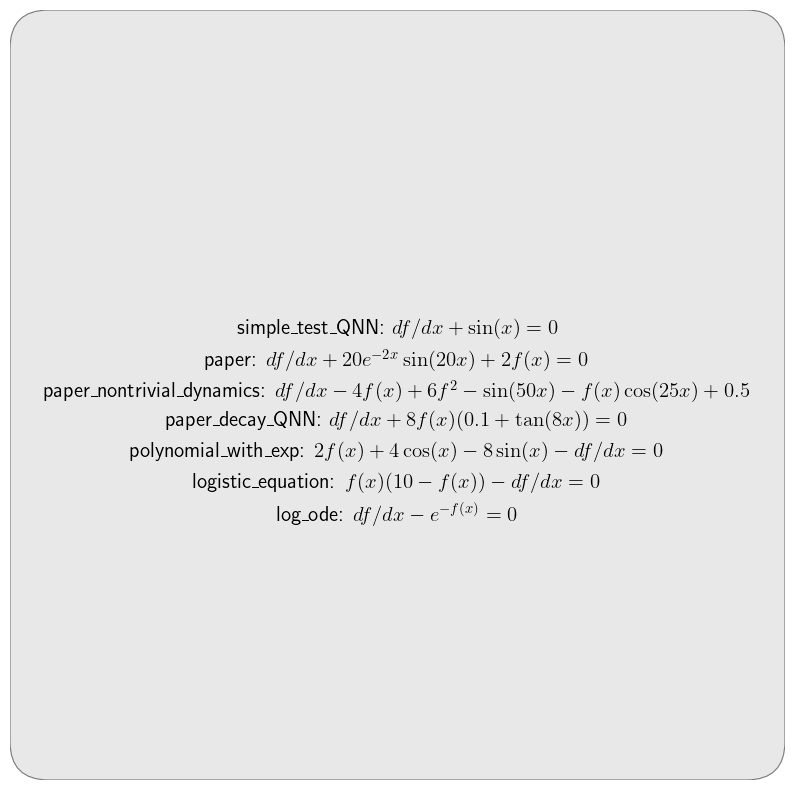

In [104]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

latex_odes = {
    "log_ode": r"df/dx - e^{-f(x)} = 0",
    "polynomial_with_exp": r"2f(x) + 4 \cos(x) - 8 \sin(x) - df/dx = 0",
    "paper_decay_QNN": r"df/dx + 8f(x)  (0.1 + \tan(8x)) = 0",
    "simple_test_QNN": r"df/dx + \sin(x) = 0",
    "paper_nontrivial_dynamics": r"df/dx -4f(x) + 6f^2 - \sin(50x)-f(x)\cos(25x) + 0.5", 
    "logistic_equation": r"f(x)(10 - f(x))-df/dx=0",
    "paper": r"df/dx + 20 e^{-2 x} \sin(20 x) + 2 f(x) = 0"
}
ode_names = ["simple_test_QNN", "paper", "paper_nontrivial_dynamics", "paper_decay_QNN", "polynomial_with_exp", "logistic_equation", "log_ode"]

plt.figure(figsize=(10, 10))
ax = plt.gca()

# Add a box around the text
rect = patches.FancyBboxPatch((0.05, 0.05), 0.9, 0.9, boxstyle="round,pad=0.05", edgecolor='black', facecolor='lightgrey', alpha=0.5)
ax.add_patch(rect)

for i, ode_name in enumerate(ode_names):
    try:
        text_str = f"{ode_name}: ${latex_odes[ode_name]}$"
        plt.text(0.5, 0.6 - i * 0.04, text_str, fontsize=15, ha='center', va='top', wrap=True)
    except:
        pass

# Remove axis
plt.axis('off')

plt.show()


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\1192101268.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.sort_values("Loss", inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\1192101268.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.drop_duplicates(subset=["Method", "DE:", "Qubits", "Layers", "eta"], inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\1192101268.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

(1e-12, 100.0)

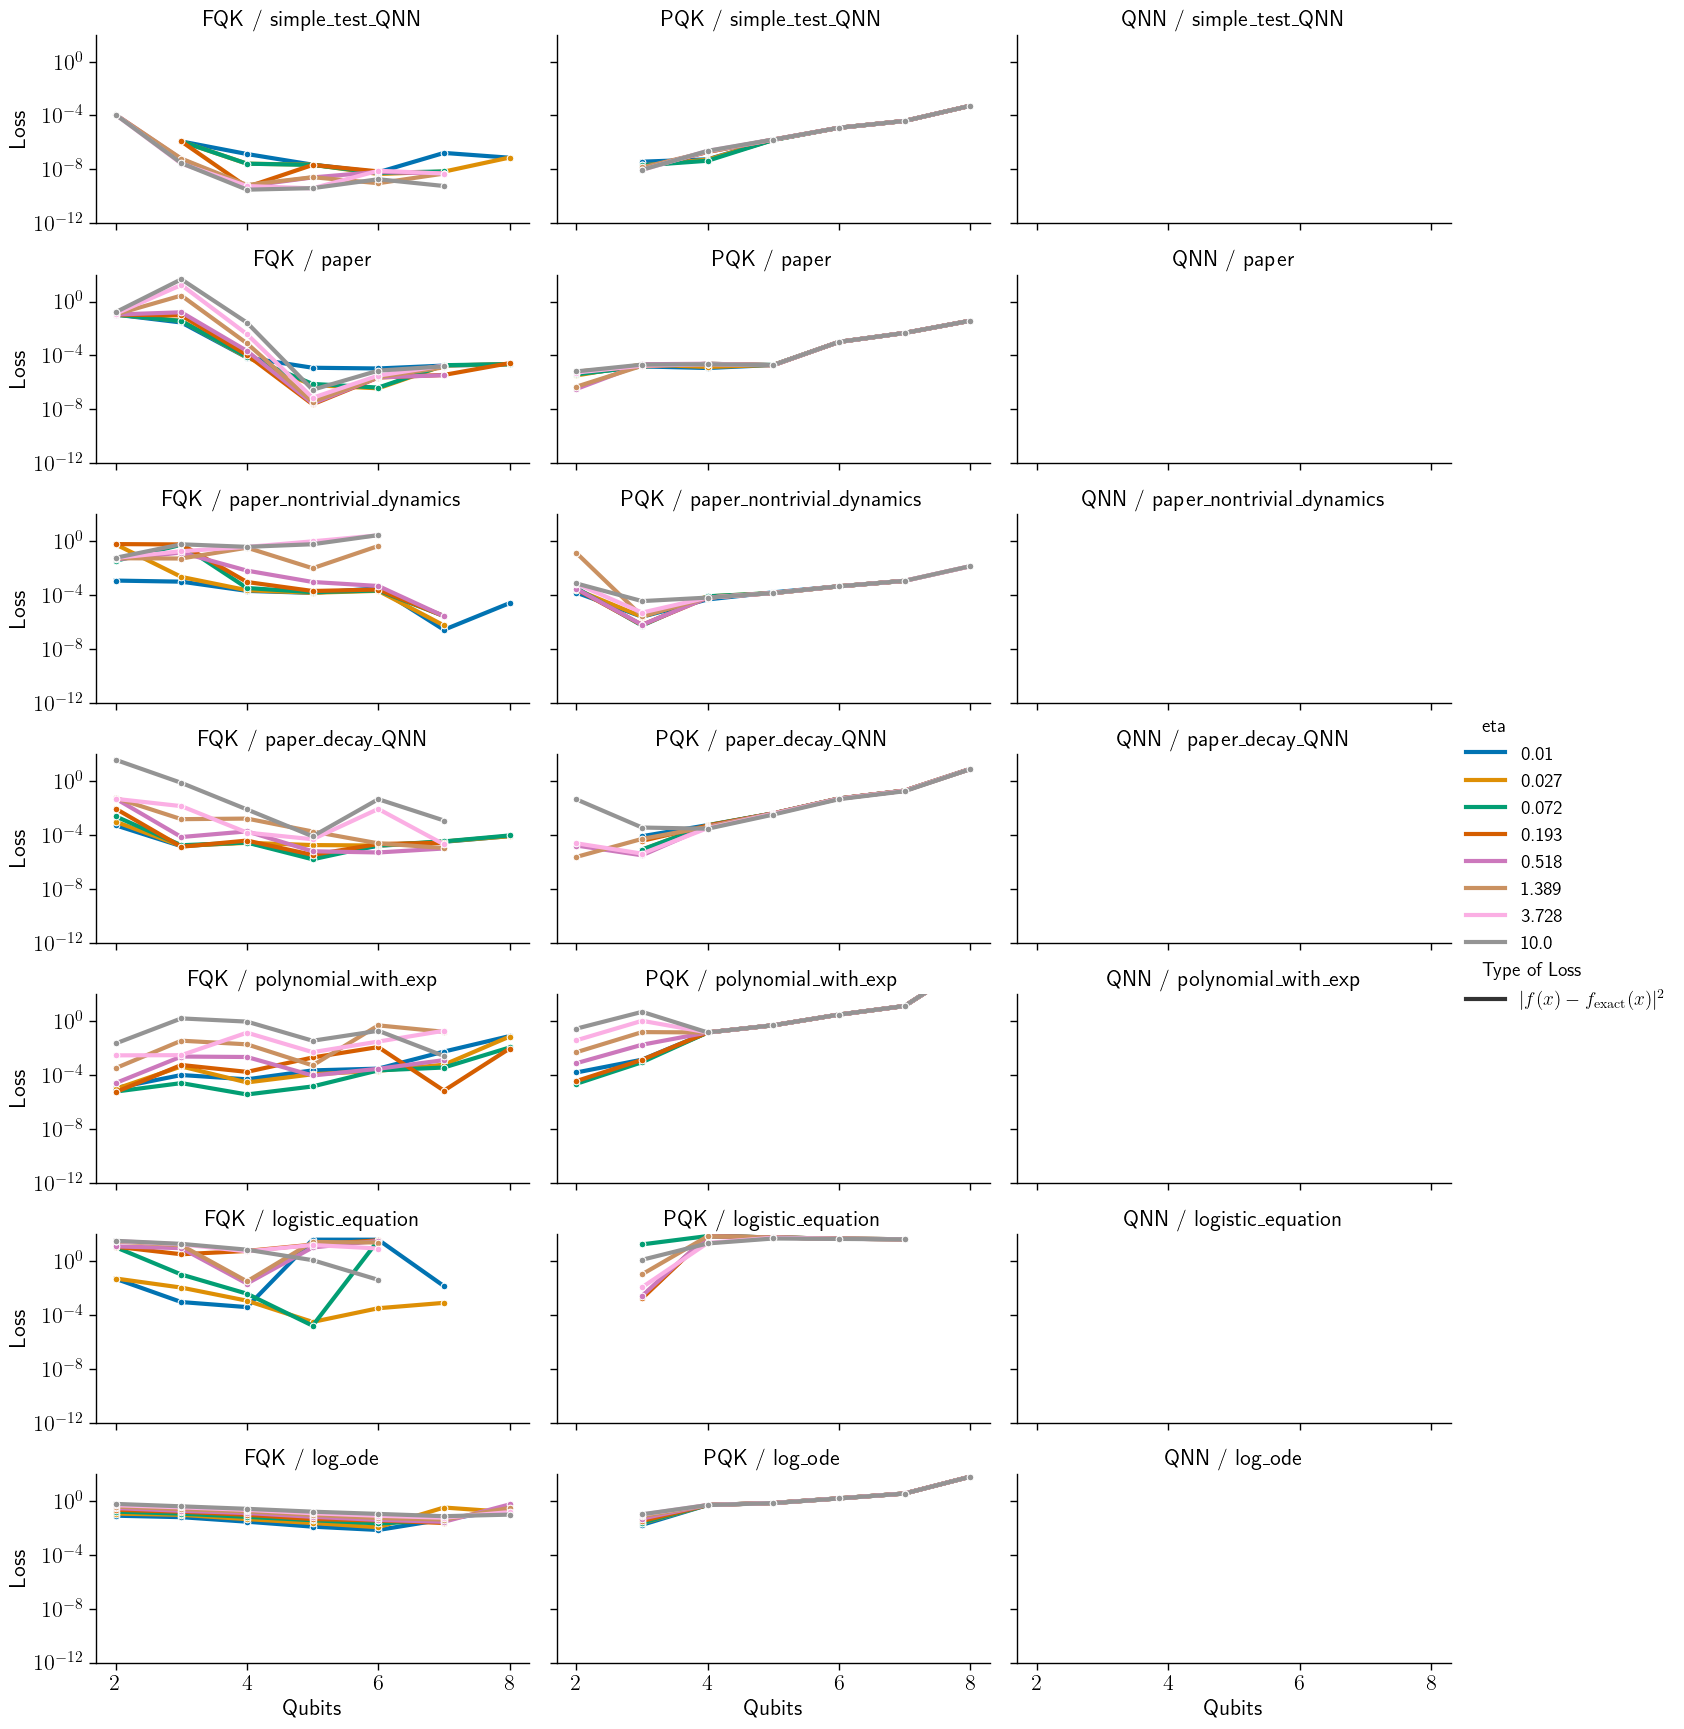

In [54]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})

palette = sns.color_palette("colorblind")
#create array with best 
best_mse_loss = combined_df
best_mse_loss = best_mse_loss[best_mse_loss["Type of Loss"] == mse_history_str]
#sort by mse loss
best_mse_loss.sort_values("Loss", inplace=True)
best_mse_loss.drop_duplicates(subset=["Method", "DE:", "Qubits", "Layers", "eta"], inplace=True)

best_loss_loss = combined_df
best_loss_loss = best_loss_loss[best_loss_loss["Type of Loss"] == loss_history_str]
best_loss_loss.sort_values("Loss", inplace=True)
best_loss_loss.drop_duplicates(subset=["Method", "DE:", "Qubits", "Layers", "eta"], inplace=True)


g = sns.relplot(x="Qubits", y="Loss",
                data=best_mse_loss,
                kind="line", 
                col="Method", 
                col_order=["FQK", "PQK", "QNN"],
                hue="eta",
                style="Type of Loss",
                row="DE:",
                row_order=ode_names,
                height=2.5,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                palette=palette
                )

#g log scale
#g title

#plt.suptitle 

g.set_titles("{col_name} / {row_name}")
g.set(yscale="log")


#leg = g._legend

plt.ylim(1e-12, 1e2)


#leg.set_frame_on(True)

#export with 400 dpi
#plt.savefig("./DE_0_30_comparison.png", dpi=400)

C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\67881035.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.sort_values("Loss", inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\67881035.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.drop_duplicates(subset=["Method", "DE:", "Qubits", "Layers", "eta"], inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\67881035.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

(1e-12, 100.0)

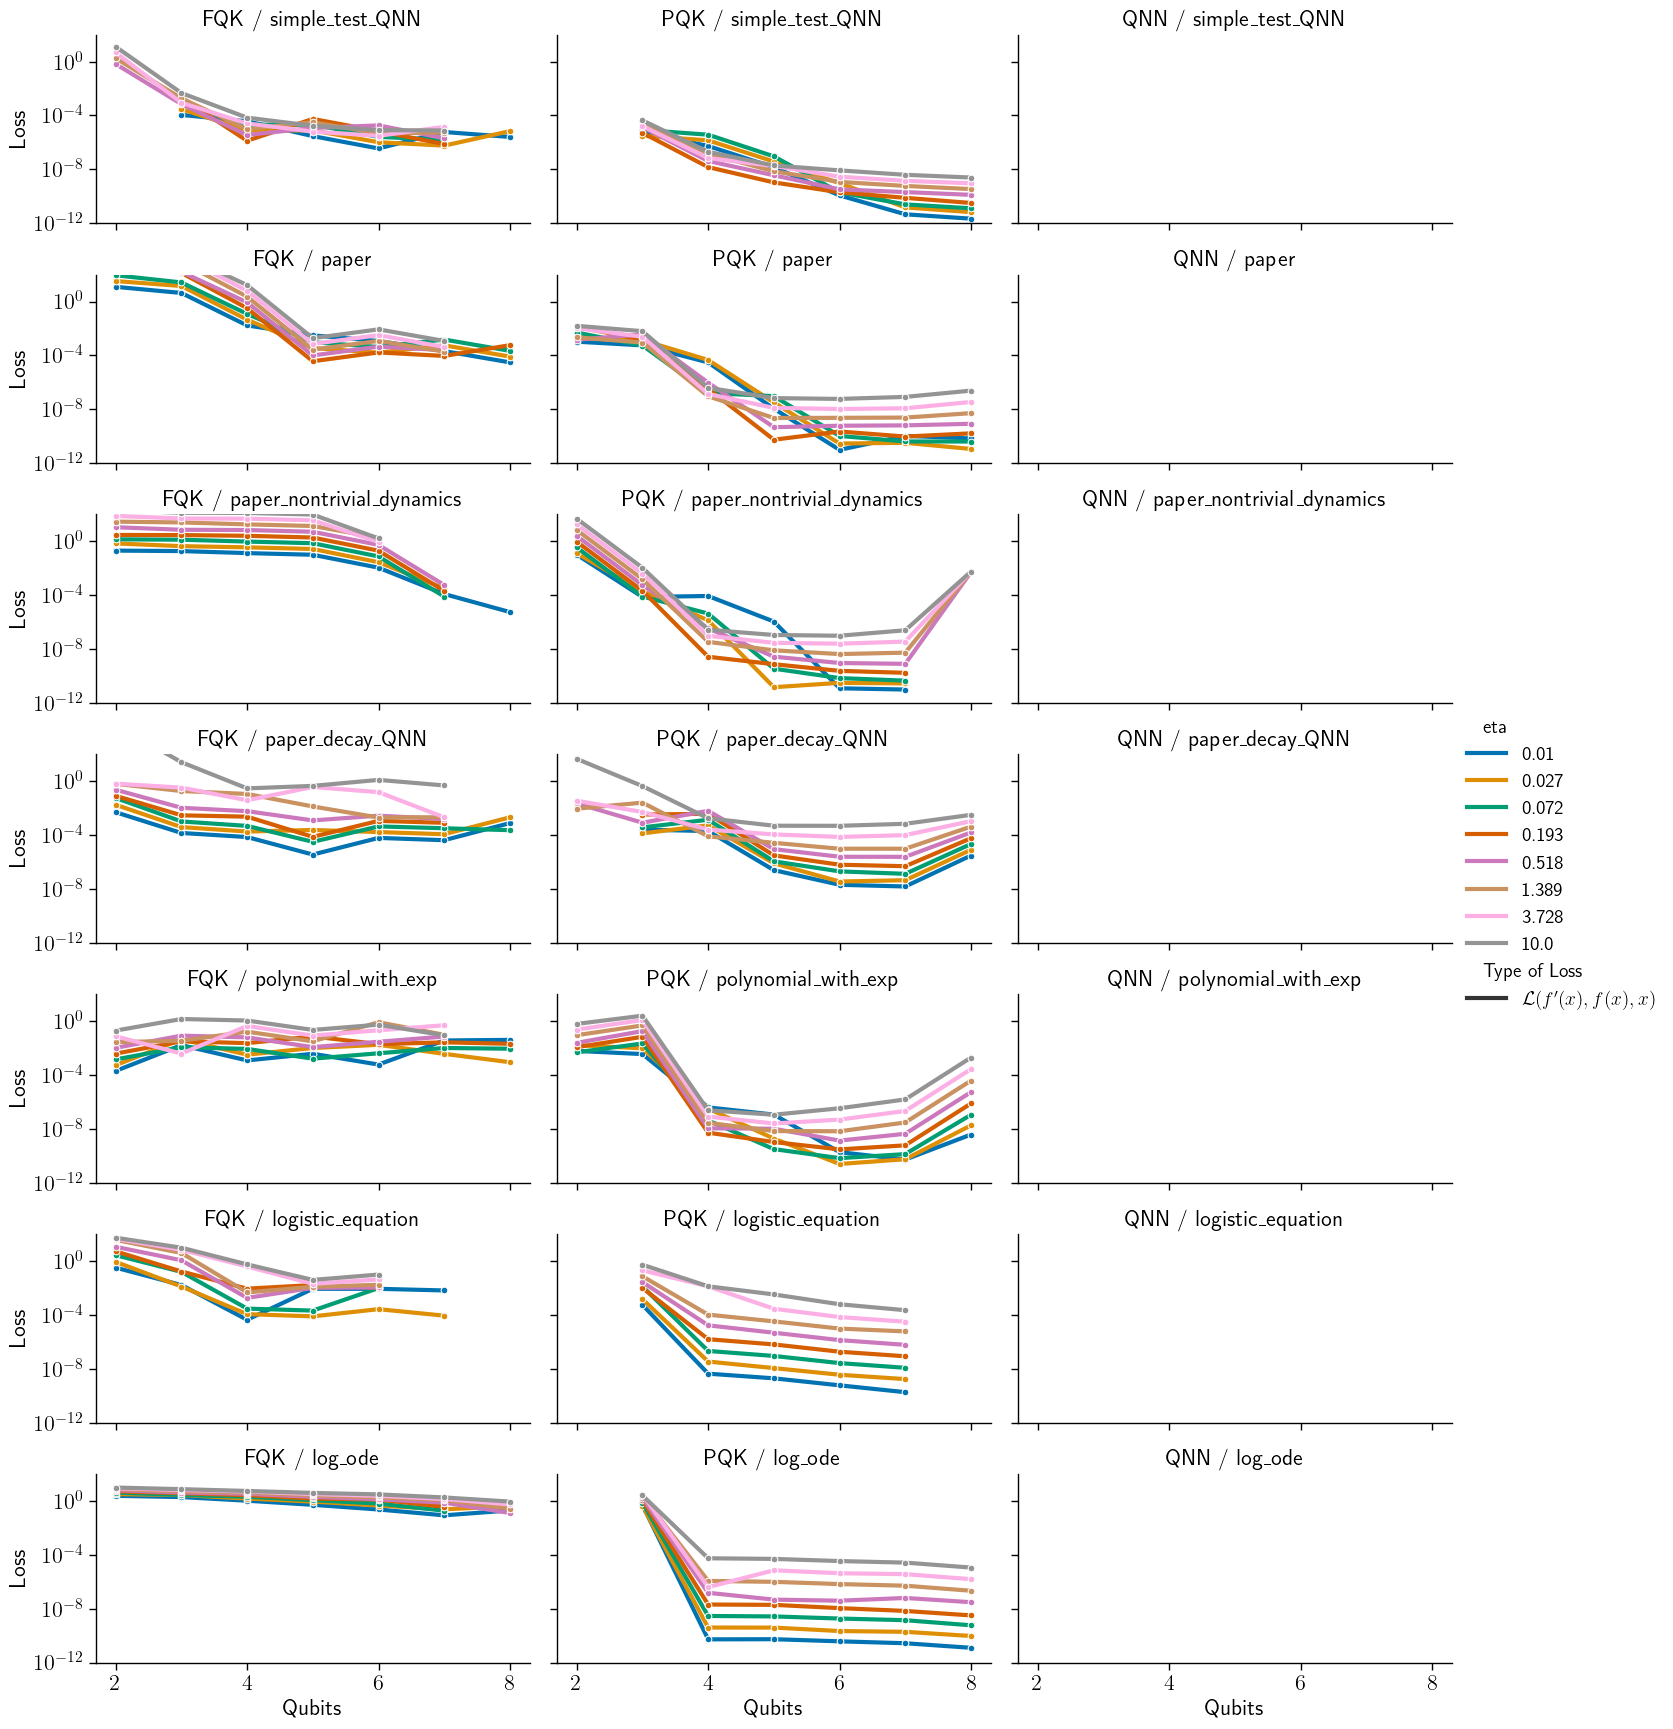

In [55]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})

palette = sns.color_palette("colorblind")
#create array with best 
best_mse_loss = combined_df
best_mse_loss = best_mse_loss[best_mse_loss["Type of Loss"] == mse_history_str]
#sort by mse loss
best_mse_loss.sort_values("Loss", inplace=True)
best_mse_loss.drop_duplicates(subset=["Method", "DE:", "Qubits", "Layers", "eta"], inplace=True)

best_loss_loss = combined_df
best_loss_loss = best_loss_loss[best_loss_loss["Type of Loss"] == loss_history_str]
best_loss_loss.sort_values("Loss", inplace=True)
best_loss_loss.drop_duplicates(subset=["Method", "DE:", "Qubits", "Layers", "eta"], inplace=True)


g = sns.relplot(x="Qubits", y="Loss",
                data=best_loss_loss,
                kind="line", 
                col="Method", 
                col_order=["FQK", "PQK", "QNN"],
                hue="eta",
                style="Type of Loss",
                row="DE:",
                row_order=ode_names,
                height=2.5,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                palette=palette
                )

#g log scale
#g title

#plt.suptitle 

g.set_titles("{col_name} / {row_name}")
g.set(yscale="log")


#leg = g._legend

plt.ylim(1e-12, 1e2)


#leg.set_frame_on(True)

#export with 400 dpi
#plt.savefig("./DE_0_30_comparison.png", dpi=400)

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the context for the plots
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})

# Assuming combined_df is already defined and contains the relevant data
# Filter data for the MSE loss


#create array with best 
best_mse_loss = combined_df
best_mse_loss = best_mse_loss[best_mse_loss["Type of Loss"] == mse_history_str]
#sort by mse loss
best_mse_loss.sort_values("Loss", inplace=True)
best_mse_loss = best_mse_loss.fillna("Unnecessary")

best_mse_loss.drop_duplicates(subset=["Method", "DE:", "Qubits"], inplace=True)

best_loss_loss = combined_df
best_loss_loss = best_loss_loss[best_loss_loss["Type of Loss"] == loss_history_str]
best_loss_loss.sort_values("Loss", inplace=True)
best_loss_loss.drop_duplicates(subset=["Method", "DE:", "Qubits"], inplace=True)

best_mse_loss["MSE Loss"] = best_mse_loss["Loss"]

# Filter for FQK and PQK methods
best_mse_fqk = best_mse_loss[best_mse_loss["Method"] == "FQK"]
best_mse_pqk = best_mse_loss[best_mse_loss["Method"] == "PQK"]

# Pivot the data to create matrices for the heatmaps
fqk_matrix = best_mse_fqk.pivot(index="DE:", columns="Qubits", values="MSE Loss")
pqk_matrix = best_mse_pqk.pivot(index="DE:", columns="Qubits", values="MSE Loss")

fqk_matrix = fqk_matrix.reindex(ode_names, axis=0)
pqk_matrix = pqk_matrix.reindex(ode_names, axis=0)



C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\1108522982.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.sort_values("Loss", inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\1108522982.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  best_mse_loss = best_mse_loss.fillna("Unnecessary")
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\1108522982.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

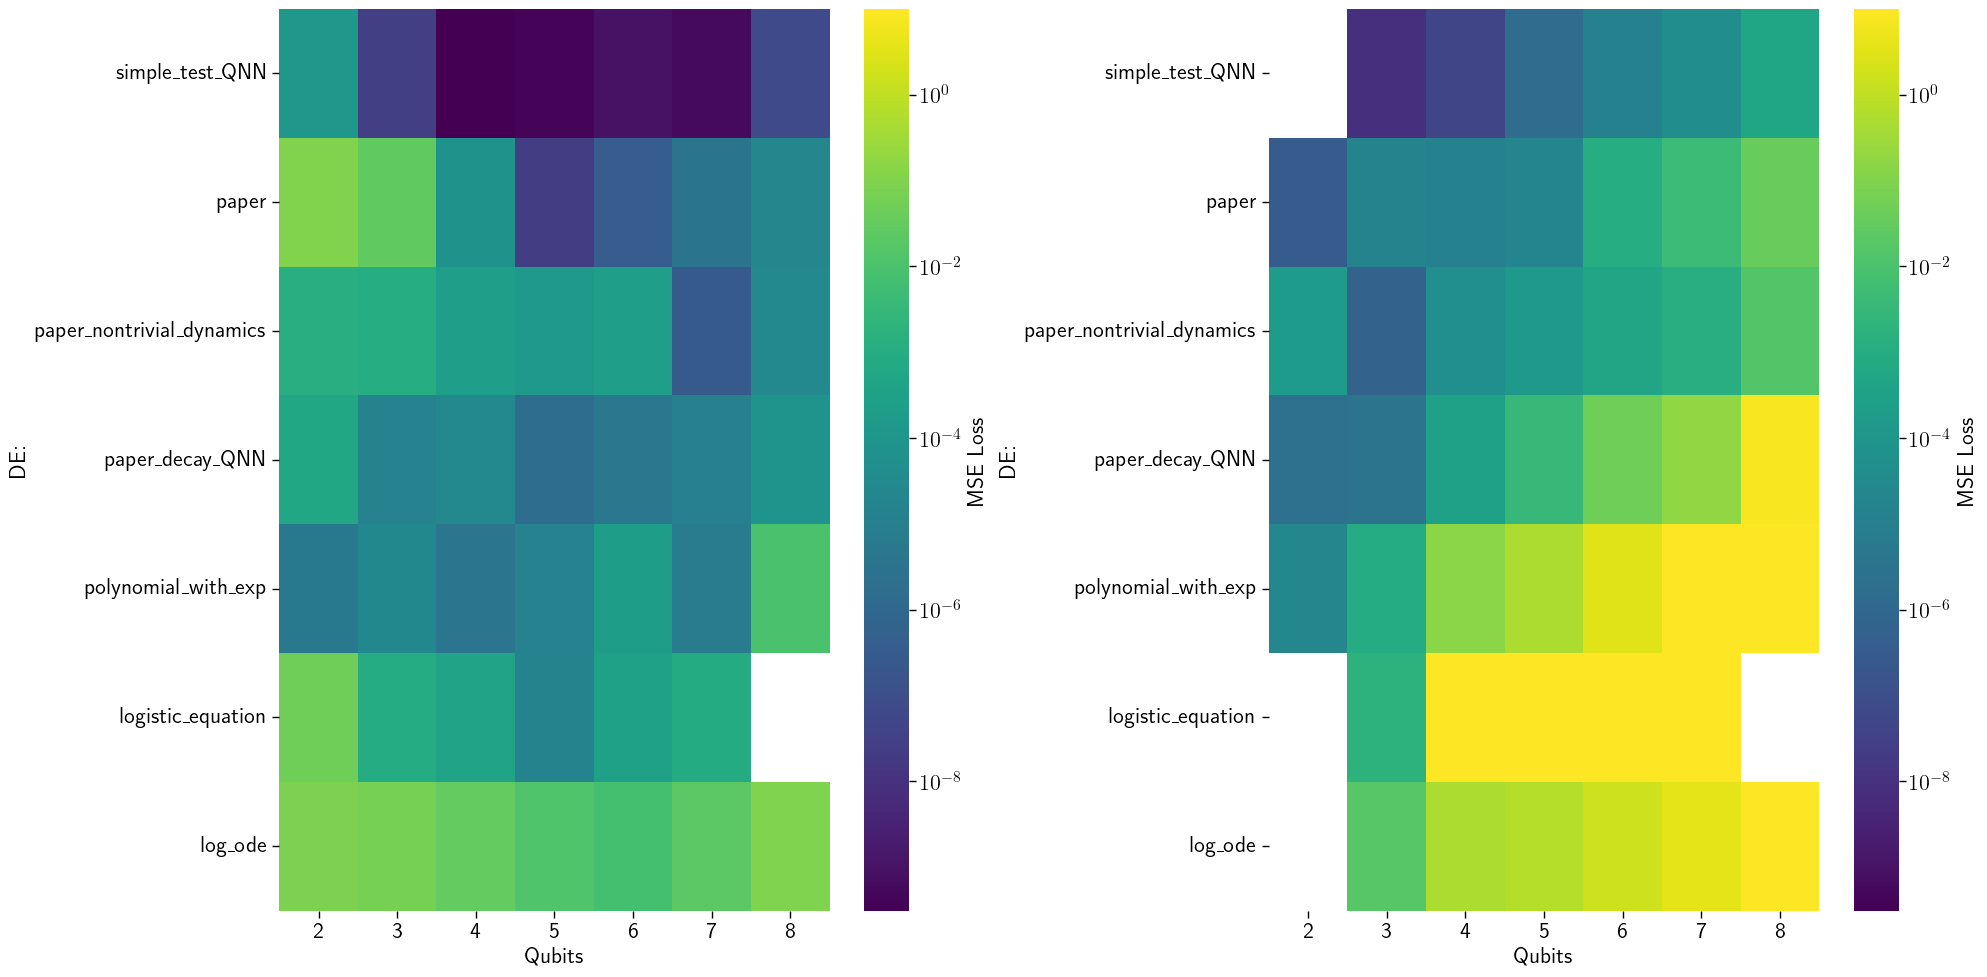

In [60]:
# sns.heatmap log scale

from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

vmin = min(fqk_matrix.min().min(), pqk_matrix.min().min())
vmax = min(max(fqk_matrix.max().max(), pqk_matrix.max().max()), 10)
shared_norm = LogNorm(vmin=vmin, vmax=vmax)
sns.heatmap(fqk_matrix, ax=ax[0], cmap="viridis", cbar_kws={'label': 'MSE Loss'}, annot_kws={"size": 12}, norm=shared_norm)
sns.heatmap(pqk_matrix, ax=ax[1], cmap="viridis", cbar_kws={'label': 'MSE Loss'}, annot_kws={"size": 12}, norm=shared_norm)


#log colorbar




plt.tight_layout()


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\1577858245.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.sort_values("Loss", inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\1577858245.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  best_mse_loss = best_mse_loss.fillna("Unnecessary")
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\1577858245.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

(1e-12, 1000000.0)

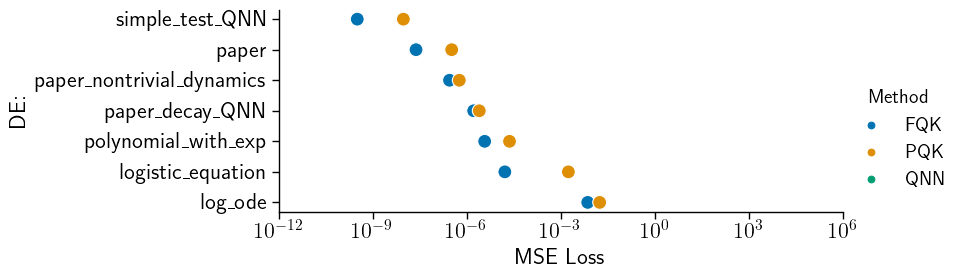

In [61]:
#make a relplot, showing the smallest value of the loss function for each method and loss function as a funtion of the number of qubits
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3})

#create array with best 
best_mse_loss = combined_df
best_mse_loss = best_mse_loss[best_mse_loss["Type of Loss"] == mse_history_str]
#sort by mse loss
best_mse_loss.sort_values("Loss", inplace=True)
best_mse_loss = best_mse_loss.fillna("Unnecessary")

best_mse_loss.drop_duplicates(subset=["Method", "DE:"], inplace=True)

best_loss_loss = combined_df
best_loss_loss = best_loss_loss[best_loss_loss["Type of Loss"] == loss_history_str]
best_loss_loss.sort_values("Loss", inplace=True)
best_loss_loss.drop_duplicates(subset=["Method", "DE:"], inplace=True)

best_mse_loss["MSE Loss"] = best_mse_loss["Loss"]

#sort y by ode_names
#best_mse_loss["DE:"] = pd.Categorical(best_mse_loss["DE:"], categories=ode_names, ordered=True)

g = sns.relplot(y="DE:", x="MSE Loss",
                data=best_mse_loss,
                kind="scatter", 
                hue="Method",
                hue_order=["FQK", "PQK", "QNN"],
                height=3,  # Adjust the height as needed
                aspect=3,  
                palette=palette,
                s=100
                )

#g log scale
#g title

#plt.suptitle 

g.set_titles("{col_name} / {row_name}")
g.set(xscale="log")


#leg = g._legend

plt.xlim(1e-12, 1e6)


#create a box of text outside of the plot with the latex ode dictionary
# Create a text box with the ODEs

plt

#leg.set_frame_on(True)

#export with 400 dpi
#plt.savefig("./DE_0_30_comparison.png", dpi=400)


C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\3416965159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.sort_values("Loss", inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\3416965159.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_mse_loss.drop_duplicates(subset=["Method", "DE:",], inplace=True)
C:\Users\jsl-rf\AppData\Local\Temp\ipykernel_17772\3416965159.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

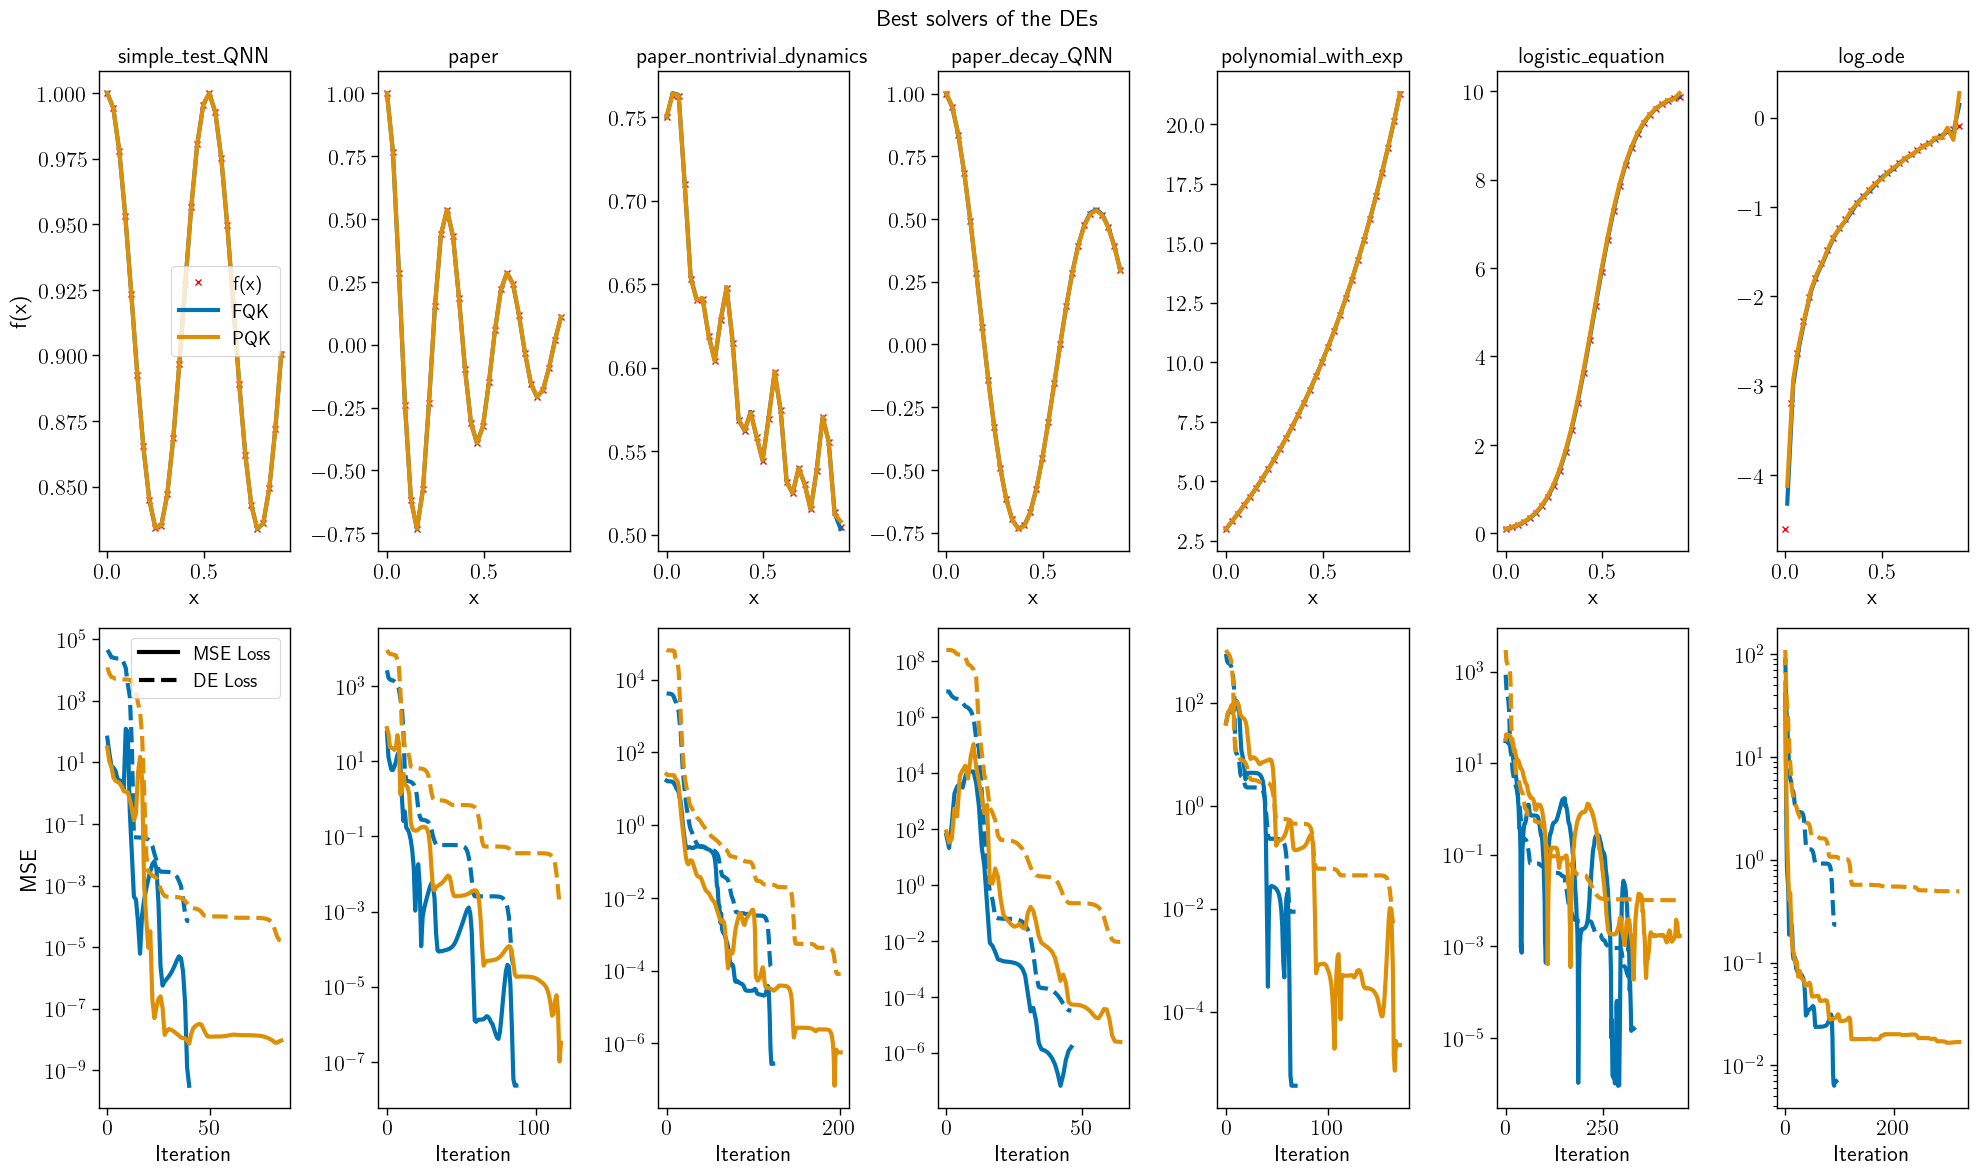

In [62]:
#create array with best 
best_mse_loss = combined_df
best_mse_loss = best_mse_loss[best_mse_loss["Type of Loss"] == mse_history_str]
##sort by mse loss
best_mse_loss.sort_values("Loss", inplace=True)
best_mse_loss.drop_duplicates(subset=["Method", "DE:",], inplace=True)
best_mse_loss.sort_values("Method", inplace=True)


# function_list = [("paper", [1], np.linspace(0, 0.9, 30)), 
#                  ("log_ode", [np.log(0.01)], np.linspace(0.01, 0.9, 30)),
#                  ("polynomial_with_exp", [3], np.linspace(0, 0.9, 30)),
#                  ("paper_decay_QNN", [1], np.linspace(0, 0.9, 30)),
#                 ("simple_test_QNN", [1], np.linspace(0, 0.9, 30)),
#                 ("paper_nontrivial_dynamics", [0.75], np.linspace(0, 0.9, 30)),
#                 ("logistic_equation", [0.1], np.linspace(0, 0.9, 30)),
f_initial = 1
true_sol = odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, best_mse_loss["domain"].iloc[0])
true_sol_continous = odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, np.linspace(0, 1, 100))

true_solution_dictionary = {
                    "paper": odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, np.linspace(0, 0.9, 30)),  
                    "log_ode": odeint(mapping_of_derivatives_of_loss_functions["log_ode"], np.log(0.01), best_mse_loss["domain"].iloc[0]), 
                    "polynomial_with_exp": odeint(mapping_of_derivatives_of_loss_functions["polynomial_with_exp"], 3, np.linspace(0, 0.9, 30)),
                    "paper_decay_QNN": odeint(mapping_of_derivatives_of_loss_functions["paper_decay_QNN"], 1, np.linspace(0, 0.9, 30)),
                    "simple_test_QNN": odeint(mapping_of_derivatives_of_loss_functions["simple_test_QNN"], 1, np.linspace(0, 0.9, 30)),
                    "paper_nontrivial_dynamics": odeint(mapping_of_derivatives_of_loss_functions["paper_nontrivial_dynamics"], 0.75, np.linspace(0, 0.9, 30)),
                    "logistic_equation": odeint(mapping_of_derivatives_of_loss_functions["logistic_equation"], 0.1, np.linspace(0, 0.9, 30))}
                              


#let us plot the predictions of the best method 

fig, axs = plt.subplots(2, len(best_mse_loss["DE:"].unique()) , figsize=(20, 12))

for j, de_name in enumerate(ode_names):
    axs[0, j].plot(best_mse_loss["domain"].iloc[0], true_solution_dictionary[de_name], "x", label="f(x)", c="red")
    for m, method in enumerate(["FQK", "PQK"]):
        df = best_mse_loss[(best_mse_loss["Method"] == method) & (best_mse_loss["DE:"] == de_name)]
        axs[0, j].plot(df["domain"].iloc[0], df["f_sol"].iloc[0], label=method, c=palette[m])
        axs[0, j].set_title(de_name)
        axs[0, j].set_xlabel("x")

        axs[1, j].plot(df["mse_history_cp"].iloc[0],  c=palette[m], linestyle="-")
        axs[1, j].plot(df["loss_history_cp"].iloc[0], c=palette[m], linestyle="--")

        axs[1, j].set_yscale("log")
        axs[1, j].set_xlabel("Iteration")

        if j == 0:
            axs[0, j].set_ylabel("f(x)")
            axs[1, j].set_ylabel("MSE")

#dummy plot to include label and then remove -, label: MSE Loss
axs[1,0].plot([0.1],[0.1], linestyle="-", label="MSE Loss", c="black")
axs[1,0].plot([1],[1], linestyle="--", label="DE Loss", c="black")



axs[1,0].legend()     
axs[0,0].legend()
plt.suptitle("Best solvers of the DEs")
plt.tight_layout()
